# Demonstration of UQ tool suite

These tools have been developed to analyse the output of PROCESS Monte Carlo runs, but can analyse data from any software and source if it can be presented in a np.DataFrame format.

There is a suite of tools design to perform sensitivity analyses (SA), uncertainty quantification (UQ)

In this example use-cases will be demonstrated.



## Step 1: Initialise and load in data using UncertaintyData

In [1]:
# %load_ext autoreload
# %autoreload 1
from pathlib import Path
from bokeh.plotting import show
import sys
import pandas as pd
from bokeh.io import output_notebook
output_notebook()
import sys
sys.path.append('/home/graeme/process_uq/uq_tools')

Loading BokehJS ...

### UncertaintyData

This is a data processing class which can perform SA.
You need to specify the names of your model inputs

In [2]:
from uncertainty_data import UncertaintyData # Import the class
# Declare the parameters you sampled.
input_names = [
            "coreradius",
            "ralpne",
            "psepbqarmax",
            "tbrnmn",
            "etaech",
            "pinjalw",
            "triang",
            "alstroh",
            "sig_tf_case_max",
            "walalw",
            "sig_tf_wp_max",
            "aspect",
            "etath",
            "n_cycle_min"
        ]
# Create and instance of the UncertaintyData class
demo_1_uq_data = UncertaintyData(path_to_uq_data_folder="/home/graeme/easyVVUQ-process/demo_runs_2/run1/", sampled_variables = input_names)
demo_1_uq_data.initialize_data() # Run data processing commands.

## Investigate PROCESS Probability of Failure
Calculate the ratio of PROCESS solutions.

In [3]:
demo_1_uq_data.calculate_failure_probability()
print("Failure probability: ", demo_1_uq_data.failure_probability, "+/- ", demo_1_uq_data.failure_cov)

Failure probability:  0.87 +/-  0.01


### Perform Regional Sensitivity Analysis
This looks for variables which cause convergence, caclulates a relative index for the most significance. 

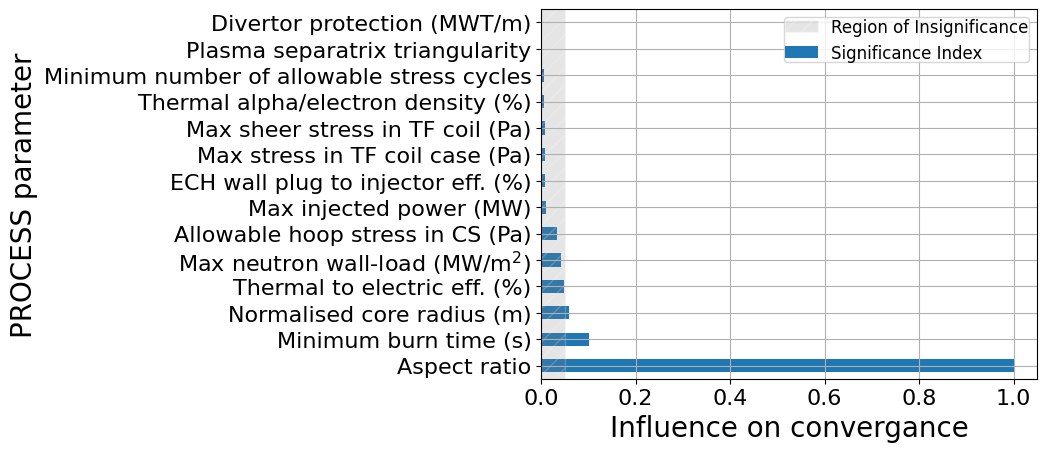

In [4]:
demo_1_uq_data.convergence_regional_sensitivity_analysis(demo_1_uq_data.sampled_variables)
demo_1_uq_data.plot_sumsq_sensitivity(export_svg=False,svg_path="/home/graeme/uq-notebooks/plots/",significance_level=0.05)


### Calculate sensitivity for a given figure of merit
In this case, find the sensitivity towards the major radius, "rmajor". 

Uses rbd_fast method from Salib library. Higher number means more sensitivity.

Then filter for sensitivity above a given number.

In [5]:
demo_1_uq_data.calculate_sensitivity(figure_of_merit="rmajor", sampled_variables=input_names)
print(demo_1_uq_data.sensitivity_df)
demo_1_uq_data.find_significant_parameters(sensitivity_data=demo_1_uq_data.sensitivity_df, significance_level=0.2)

                       S1   S1_conf
tbrnmn           0.643944  0.079682
triang           0.238683  0.125216
walalw           0.124788  0.101700
etaech           0.094176  0.094130
sig_tf_wp_max    0.092535  0.095911
etath            0.089315  0.090899
pinjalw          0.088815  0.079996
coreradius       0.084433  0.094325
ralpne           0.078770  0.089176
sig_tf_case_max  0.067586  0.093127
aspect           0.066142  0.080296
psepbqarmax      0.062246  0.094339
alstroh          0.029475  0.078744
n_cycle_min     -0.000975  0.065561


['tbrnmn', 'triang']

#### Create

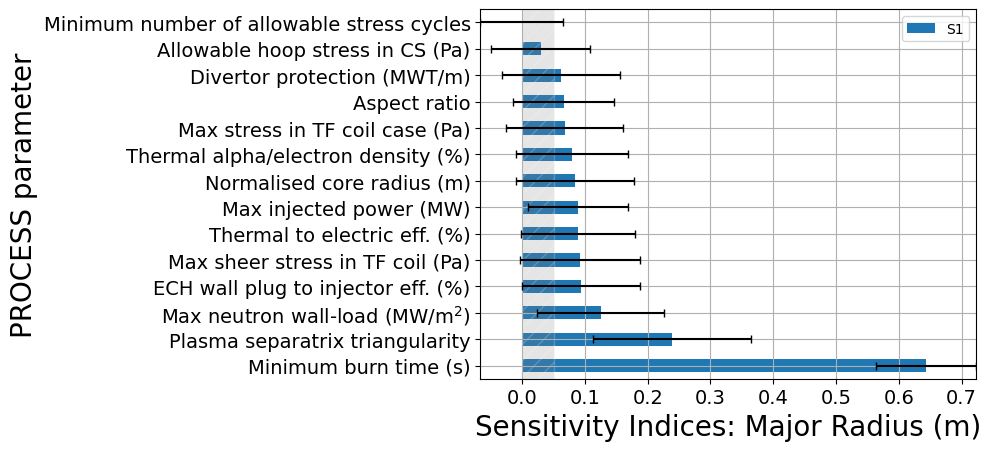

In [10]:
demo_1_uq_data.plot_rbd_si_indices(figure_of_merit="Major Radius (m)")
significant_rmajor_variables=demo_1_uq_data.find_significant_parameters(sensitivity_data=demo_1_uq_data.sensitivity_df,significance_level=0.1)
significant_rmajor_variables.append("rmajor")

## Create a scatter plot of the results
- This creates a histogram color map of converged solutions. 
- The diagonal is a histogram, this can be changed to "kde" in the code. 
- Set "plot_unconverged = True" to plot unconverged runs on same axis.

- Instead of plotting every single point, a histogram heatmap is create.
- This can be used for visual identification of relationships, if there is a linear slant to the data it indicates a relationship exists.

Ploting user named parameters.


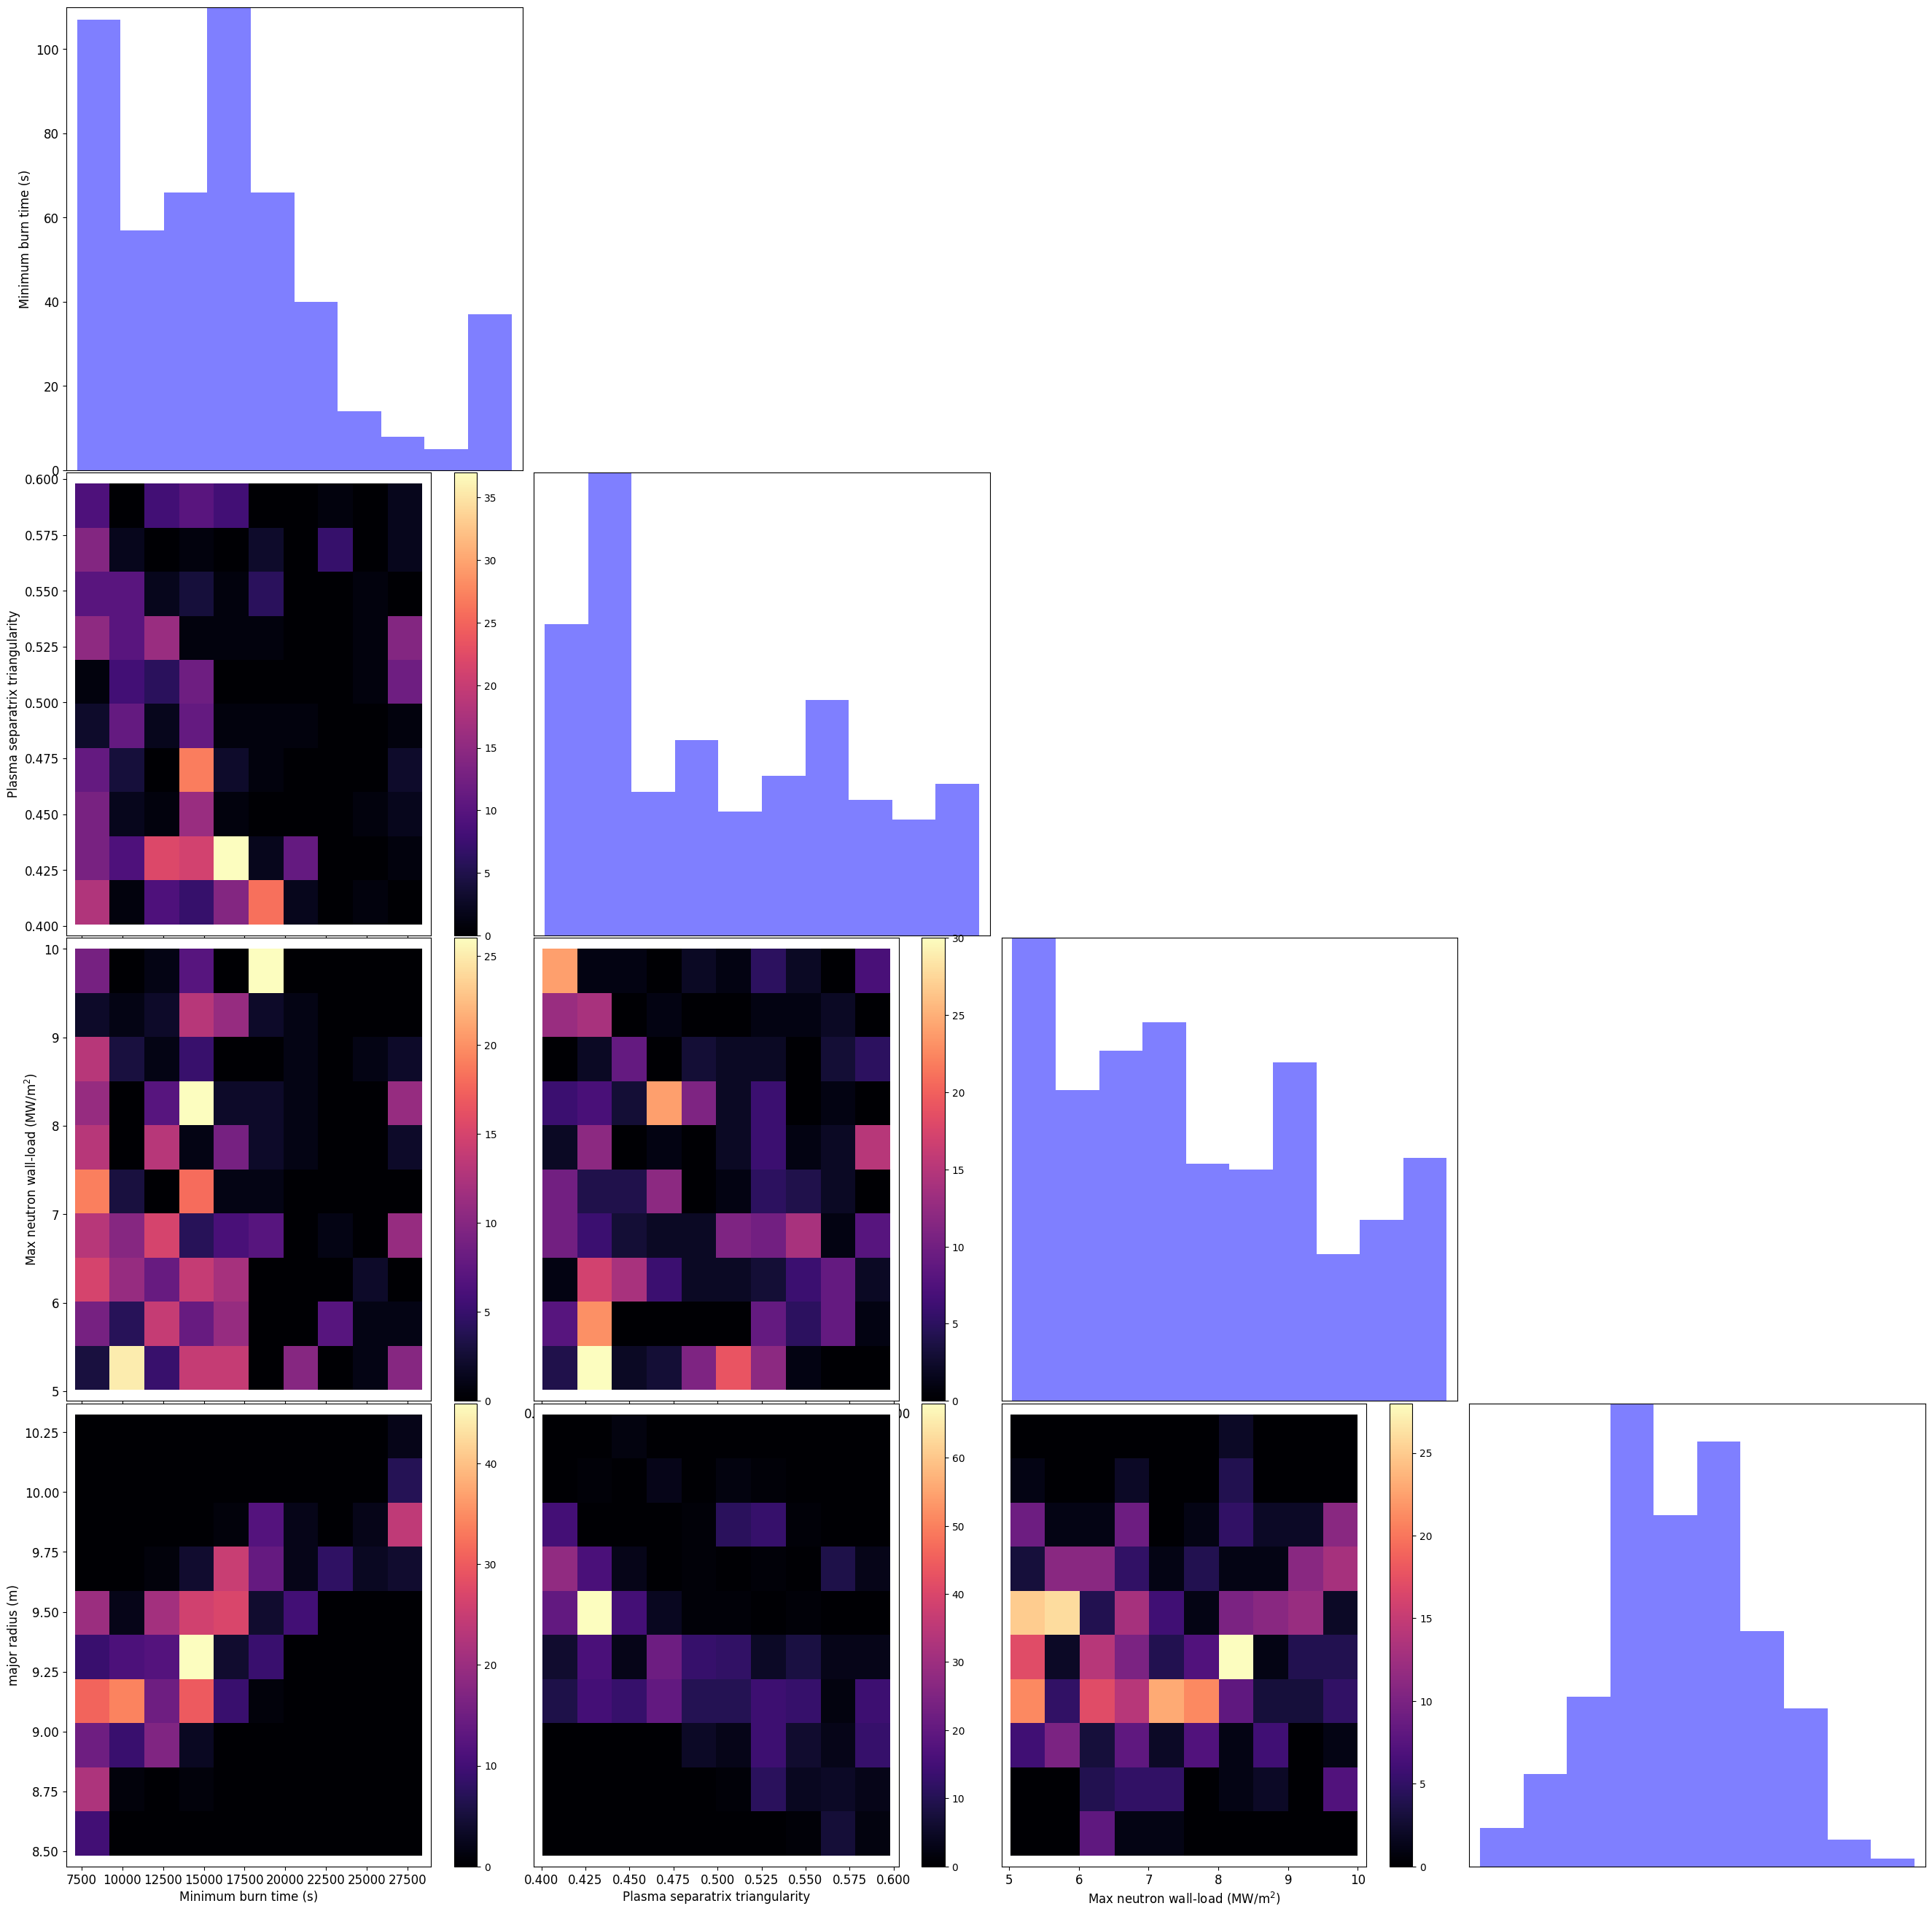

In [11]:
demo_1_uq_data.configure_data_for_plotting(variables_to_plot=significant_rmajor_variables)
demo_1_uq_data.plot_scatter_plot(plot_unconverged=False)

## Create CDF plots
Plot the CDF of converged and unconverged samples, as well as the convergence rate for a given sampled parameter.

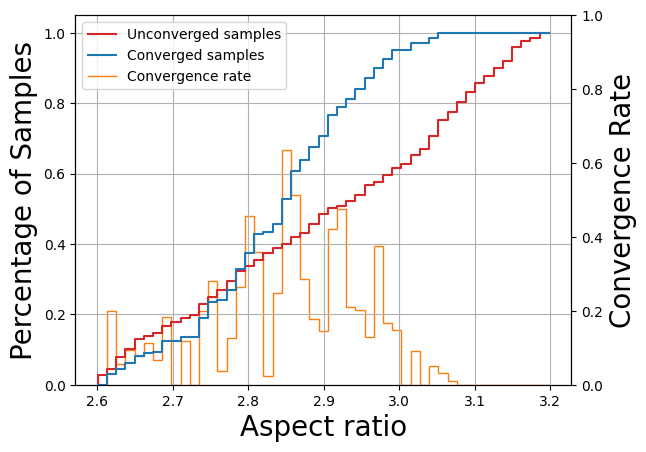

In [8]:
demo_1_uq_data.ecdf_plot("aspect")